In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('BD\Supermercado.csv')

#### Key del Dataset
order_id – (A unique number to identity the order)

user_id - (A unique number to identify the user)

order_number – (Number of the order)

order_dow – (Day of the Week the order was made)

order_hour_of_day – (Time of the order)

days_since_prior_order - (History of the order)

product_id – (Id of the product)

add_to_cart_order – (Number of items added to cart)

reordered – (If the reorder took place)

department_id - (Unique number allocated to each department)

department – (Names of the departments)

product_name – (Name of the products)

#### Info basica DF

In [38]:
df.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list
0,2425083,49125,1,2,18,0.00,17,1,0,13,pantry,baking ingredients,Noche
1,2425083,49125,1,2,18,0.00,91,2,0,16,dairy eggs,soy lactosefree,Noche
2,2425083,49125,1,2,18,0.00,36,3,0,16,dairy eggs,butter,Noche
3,2425083,49125,1,2,18,0.00,83,4,0,4,produce,fresh vegetables,Noche
4,2425083,49125,1,2,18,0.00,83,5,0,4,produce,fresh vegetables,Noche


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [5]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [36]:
import pandas as pd

# Configura Pandas para que no use notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Ahora cuando uses describe(), los números se mostrarán como flotantes
print(df.describe())


        order_id    user_id  order_number  order_dow  order_hour_of_day  \
count 2019501.00 2019501.00    2019501.00 2019501.00         2019501.00   
mean  1707012.76  103067.27         17.15       2.74              13.44   
std    985983.20   59491.17         17.53       2.09               4.24   
min        10.00       2.00          1.00       0.00               0.00   
25%    852649.00   51584.00          5.00       1.00              10.00   
50%   1705004.00  102690.00         11.00       3.00              13.00   
75%   2559031.00  154600.00         24.00       5.00              16.00   
max   3421080.00  206209.00        100.00       6.00              23.00   

       days_since_prior_order  product_id  add_to_cart_order  reordered  \
count              2019501.00  2019501.00         2019501.00 2019501.00   
mean                    10.68       71.21               8.36       0.59   
std                      9.11       38.21               7.15       0.49   
min                     

In [6]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [7]:
#Quitamos los nulos
df['days_since_prior_order'].fillna(0, inplace=True)

C:\Users\Matias\AppData\Local\Temp\ipykernel_7672\3651962437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_prior_order'].fillna(0, inplace=True)


In [8]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [11]:
department_counts = df['department'].value_counts()
product_name_counts = df['product_name'].value_counts()

print("Department counts:\n", department_counts)
print("\nProduct name counts:\n", product_name_counts)


Department counts:
 department
produce            588996
dairy eggs         336915
snacks             180692
beverages          168126
frozen             139536
pantry             116262
bakery              72983
canned goods        66053
deli                65176
dry goods pasta     54054
household           46446
breakfast           44605
meat seafood        44271
personal care       28134
babies              25940
international       16738
alcohol              9439
pets                 6013
missing              4749
other                2240
bulk                 2133
Name: count, dtype: int64

Product name counts:
 product_name
fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                      

#### Ventas segun Dia y Momento del Dia

In [12]:
df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)

,order_hour_of_day,user_id
10,10,173306
11,11,170291
14,14,167831
15,15,167157
13,13,166376
12,12,163511
16,16,158247
9,9,150248
17,17,129383
8,8,106754


array([<AxesSubplot:ylabel='count'>], dtype=object)

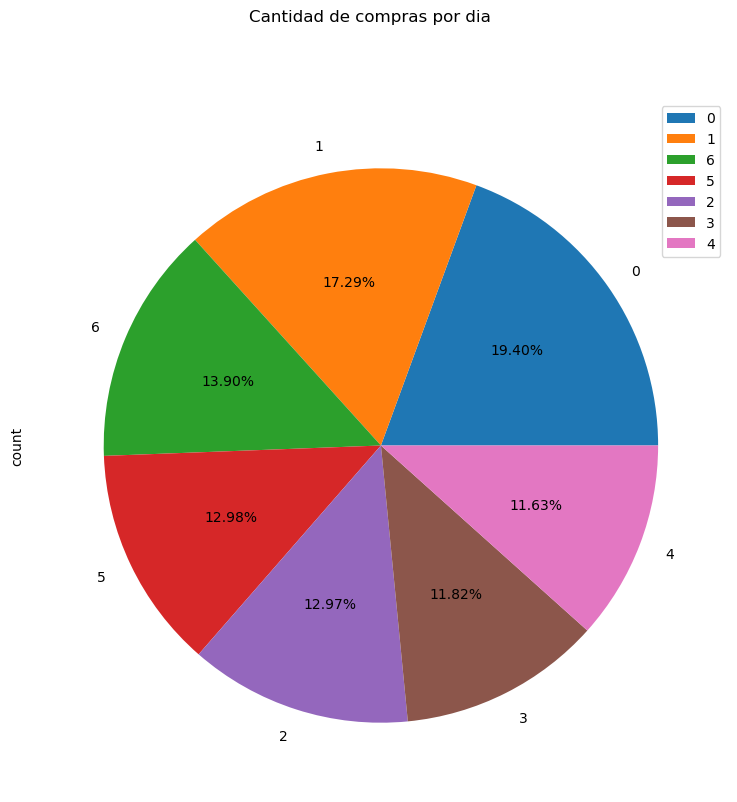

In [13]:
df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie', autopct='%1.2f%%', subplots=True,
                                                                                                title='Cantidad de compras por dia', figsize=(9, 9))

In [14]:
def order_time(x):
    if x in[6, 7, 8, 9, 10, 11, 12]:
        return 'Manana'
    if x in[13, 14, 15, 16, 17]:
        return 'Tarde'
    if x in[18, 19, 20, 21, 22]:
        return 'Noche'
    if x in[23, 24, 0, 1, 2, 3, 4, 5]:
        return 'Madrugada'
    return x

In [15]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list
0,2425083,49125,1,2,18,0.0,17,1,0,13,pantry,baking ingredients,Noche
1,2425083,49125,1,2,18,0.0,91,2,0,16,dairy eggs,soy lactosefree,Noche
2,2425083,49125,1,2,18,0.0,36,3,0,16,dairy eggs,butter,Noche
3,2425083,49125,1,2,18,0.0,83,4,0,4,produce,fresh vegetables,Noche
4,2425083,49125,1,2,18,0.0,83,5,0,4,produce,fresh vegetables,Noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables,Noche
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water,Noche
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce,Noche
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce,Noche


<AxesSubplot:title={'center':'Momento del dia en que se realizo la orden'}, xlabel='order_time_list'>

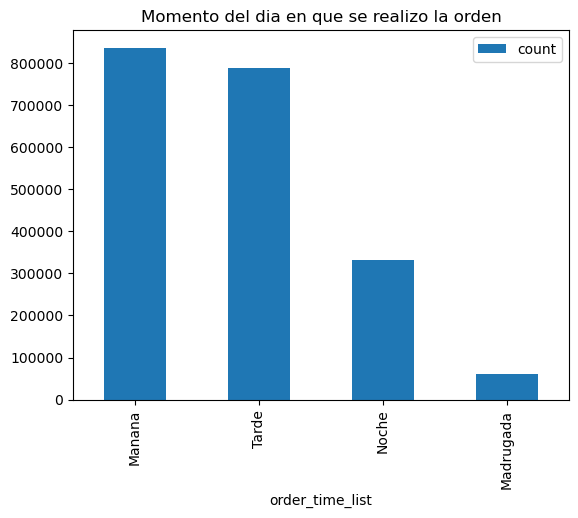

In [16]:
df.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='bar',
                                                                                                      title='Momento del dia en que se realizo la orden')

In [17]:
df.pivot_table(index='order_dow', columns='order_time_list', values='user_id', aggfunc=['count'])

count                       
order_time_list Madrugada  Manana  Noche   Tarde
order_dow                                       
0                   11157  157546  60195  162933
1                    8850  158356  51825  130205
2                    7926  108266  45497  100223
3                    7199   95722  41737   94072
4                    8017   92301  45359   89207
5                    8607  110126  42311  101113
6                    9544  114229  45737  111241

In [18]:
import pandas as pd

# Asumiendo que df ya está definido y contiene las columnas necesarias
pivot_table = df.pivot_table(index='order_dow', columns='order_time_list', values='user_id', aggfunc='count')

# Orden correcto de las columnas
correct_order = ['Madrugada', 'Manana', 'Tarde', 'Noche']

# Reordenamos las columnas según el orden deseado
pivot_table = pivot_table[correct_order]

# Muestra el resultado reordenado
print(pivot_table)


order_time_list  Madrugada  Manana   Tarde  Noche
order_dow                                        
0                    11157  157546  162933  60195
1                     8850  158356  130205  51825
2                     7926  108266  100223  45497
3                     7199   95722   94072  41737
4                     8017   92301   89207  45359
5                     8607  110126  101113  42311
6                     9544  114229  111241  45737


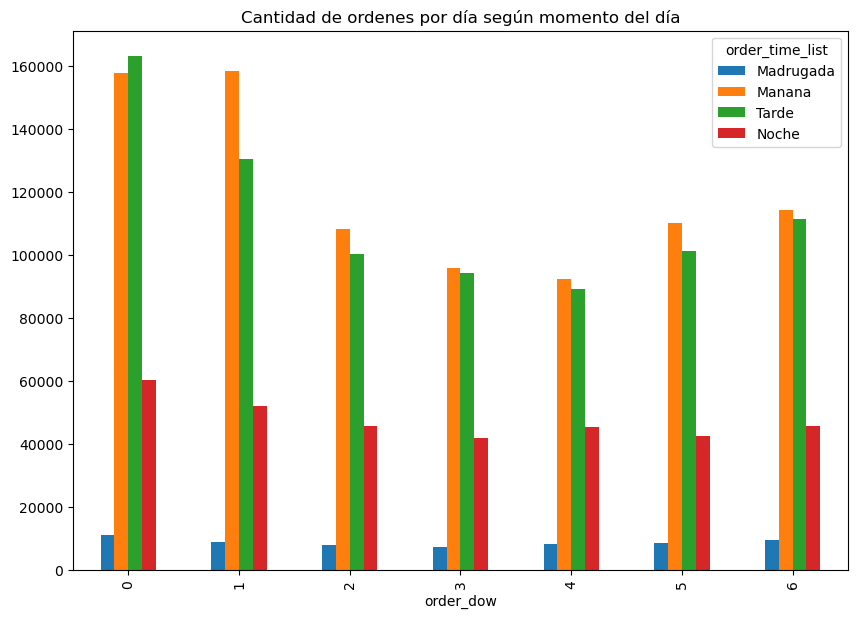

In [19]:
# Asumiendo que df ya está definido y contiene las columnas necesarias
pivot_table = df.pivot_table(index='order_dow', columns='order_time_list', values='user_id', aggfunc='count')

# Ordena las columnas en el orden deseado
ordered_columns = ['Madrugada', 'Manana', 'Tarde', 'Noche']
pivot_table = pivot_table.reindex(ordered_columns, axis=1)

# Grafica el resultado
pivot_table.plot(kind='bar', title='Cantidad de ordenes por día según momento del día', figsize=(10, 7))
plt.show()

#### Top 10 de Productos Vendidos

In [21]:
Most_sold_product = df.groupby("product_name")[['add_to_cart_order']].sum().reset_index()
top_10_products = Most_sold_product.sort_values(ascending = False, by = 'add_to_cart_order').head(10)

In [22]:
top_10_products.columns

Index(['product_name', 'add_to_cart_order'], dtype='object')

In [25]:
px.bar(top_10_products, x= 'product_name', y= 'add_to_cart_order',color = 'add_to_cart_order')

#### Segmentacion de Clientes por Cantidad de Ordenes

In [44]:
import pandas as pd

# Asumiendo que df ya está definido y contiene las columnas necesarias
# Calcula el máximo order_number por user_id
max_order_numbers = df.groupby('user_id')['order_number'].max().reset_index()
max_order_numbers.rename(columns={'order_number': 'max_order'}, inplace=True)

# Une esta información al DataFrame original
df = df.merge(max_order_numbers, on='user_id', how='left')

# Muestra las primeras filas del DataFrame actualizado para verificar
print(df.head())


   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2425083    49125             1          2                 18   
1   2425083    49125             1          2                 18   
2   2425083    49125             1          2                 18   
3   2425083    49125             1          2                 18   
4   2425083    49125             1          2                 18   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                    0.00          17                  1          0   
1                    0.00          91                  2          0   
2                    0.00          36                  3          0   
3                    0.00          83                  4          0   
4                    0.00          83                  5          0   

   department_id  department        product_name order_time_list  max_order  
0             13      pantry  baking ingredients           Noche         36  
1       

In [45]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list,max_order
0,2425083,49125,1,2,18,0.00,17,1,0,13,pantry,baking ingredients,Noche,36
1,2425083,49125,1,2,18,0.00,91,2,0,16,dairy eggs,soy lactosefree,Noche,36
2,2425083,49125,1,2,18,0.00,36,3,0,16,dairy eggs,butter,Noche,36
3,2425083,49125,1,2,18,0.00,83,4,0,4,produce,fresh vegetables,Noche,36
4,2425083,49125,1,2,18,0.00,83,5,0,4,produce,fresh vegetables,Noche,36


In [46]:
def order_number_group(x):
    if x <= 20:
        x = '1-20 order'
    elif x >20 and x <=40:
        x = '21-40 order'
    elif x >40 and x <=60:
        x = '41-60 order'
    elif x >60 and x <=80:
        x = '61-80 order'
    else:
        x = '81-100 order'
    return x

In [47]:
df['order_number_group']=df['max_order'].apply(order_number_group)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list,max_order,order_number_group
0,2425083,49125,1,2,18,0.00,17,1,0,13,pantry,baking ingredients,Noche,36,21-40 order
1,2425083,49125,1,2,18,0.00,91,2,0,16,dairy eggs,soy lactosefree,Noche,36,21-40 order
2,2425083,49125,1,2,18,0.00,36,3,0,16,dairy eggs,butter,Noche,36,21-40 order
3,2425083,49125,1,2,18,0.00,83,4,0,4,produce,fresh vegetables,Noche,36,21-40 order
4,2425083,49125,1,2,18,0.00,83,5,0,4,produce,fresh vegetables,Noche,36,21-40 order
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.00,83,8,0,4,produce,fresh vegetables,Noche,23,21-40 order
2019497,458285,128787,42,2,19,3.00,115,1,1,7,beverages,water seltzer sparkling water,Noche,63,61-80 order
2019498,458285,128787,42,2,19,3.00,32,2,1,4,produce,packaged produce,Noche,63,61-80 order
2019499,458285,128787,42,2,19,3.00,32,3,1,4,produce,packaged produce,Noche,63,61-80 order


array([<AxesSubplot:ylabel='count'>], dtype=object)

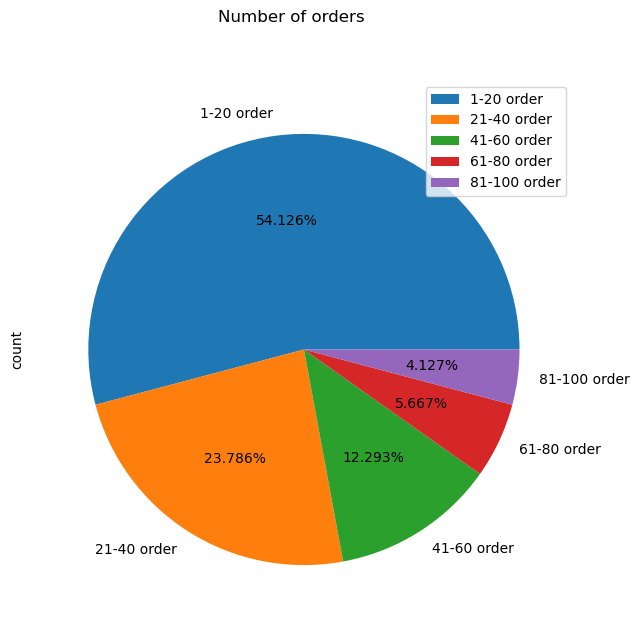

In [50]:
df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie', autopct='%1.3f%%', subplots=True,
                                                                                                        title='Number of orders', figsize=(10, 7))